# Basic Clustering EDA





## Setup


In [1]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

## Loading Data

In [2]:
df = pd.read()
df.info()

NameError: name 'pd' is not defined

In [3]:
df.describe()

NameError: name 'df' is not defined

## Dummy Dataset

## Features Explained

## Metrics

### Distance Metrics

The distance of two feature vectors: 

#### Euclidian Distance

### Loss Metrics

#### Unsupervised

#### Supervised
silhouette_score, davies_bouldin_score, v_measure_score

In [4]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

## Scaling



## Dimensionality Reduction


### Principal component analysis - PCA

In [54]:
from sklearn.decomposition import PCA
n_prin_comp = 3
pca = PCA(n_components=n_features, svd_solver='full')
X1_pca = pca.fit_transform(X1)

### Individual component analysis - ICA

In [55]:
from sklearn.decomposition import FastICA
n_ind_comp = 3
ica = FastICA(n_components=n_ind_comp)
X1_ica = ica.fit_transform(X1)

### t-SNE

## Clustering Methods

The following table shows a short summary of the methods https://scikit-learn.org/stable/modules/clustering.html


| Method name                  | Parameters                                                       | Scalability                                                 | Usecase                                                                   | Geometry (metric used)                       |
|------------------------------|------------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means                      | number of clusters                                               | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points                     |
| Affinity propagation         | damping, sample preference                                       | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Graph distance (e.g. nearest-neighbor graph) |
| Mean-shift                   | bandwidth                                                        | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Distances between points                     |
| Spectral clustering          | number of clusters                                               | Medium n_samples, small n_clusters                          | Few clusters, even cluster size, non-flat geometry                        | Graph distance (e.g. nearest-neighbor graph) |
| Ward hierarchical clustering | number of clusters or distance threshold                         | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints                          | Distances between points                     |
| Agglomerative clustering     | number of clusters or distance threshold, linkage type, distance | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| DBSCAN                       | neighborhood size                                                | Very large n_samples, medium n_clusters                     | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| OPTICS                       | minimum cluster membership                                       | Very large n_samples, large n_clusters                      | Non-flat geometry, uneven cluster sizes, variable cluster density         | Distances between points                     |
| Gaussian mixtures            | many                                                             | Not scalable                                                | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| Birch                        | branching factor, threshold, optional global clusterer.          | Large n_clusters and n_samples                              | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |


In [5]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs


In [56]:
n_features = 128
n_cluster = 2
cluster_std = .1
n_samples = 20000

In [57]:
X1, y1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

## K-means and the elbow plot

Question: Is KMeans able to identify two types of operation and how distinct is the separation?
As a measure we use:

1. Unsupervised metric: 
    
    a. KMeans-Score

2. Supervised metrics:
    
    a. Silhouette score
    
    b. V-Measure score

In [58]:
from sklearn.cluster import KMeans
X_scaled = X1
y = y1

In [59]:
km_scores = []
km_silhouette = []
vmeasure_score = []
db_score = []

n_clusters = 50

for i in range(2,n_clusters):
    km = KMeans(n_clusters=i, n_jobs=-1, init='k-means++').fit(X_scaled)
    preds = km.predict(X_scaled)
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("-"*100)

Score for number of cluster(s) 2: -25586.543100660158
Silhouette score for number of cluster(s) 2: 0.9826497392374822
V-measure score for number of cluster(s) 2: 1.0
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -25518.73923561622
Silhouette score for number of cluster(s) 3: 0.49394413961101735
V-measure score for number of cluster(s) 3: 0.8024088297268717
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -25450.611868024454
Silhouette score for number of cluster(s) 4: 0.005333275633145665
V-measure score for number of cluster(s) 4: 0.6693517942592497
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -25395.532438042406
Silhouette score for number of cluster(s) 5: 0.005120011801436026
V-measure score for number of cluster(s) 5: 0.6

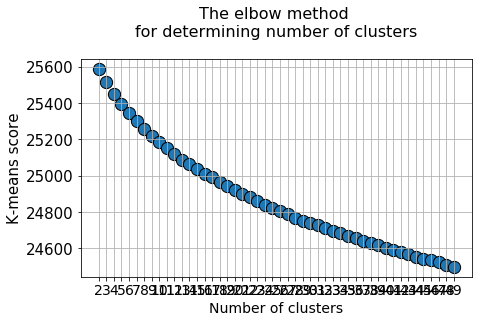

In [60]:
plt.figure(figsize=(7,4))
plt.title("The elbow method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,n_clusters)],y=km_scores,s=150, edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,n_clusters)],fontsize=14)
plt.yticks(fontsize=15)

plt.show()

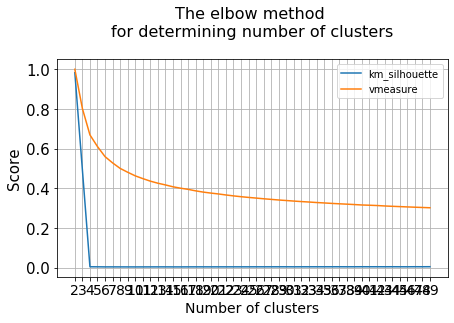

In [61]:
plt.figure(figsize=(7,4))
plt.title("The elbow method \nfor determining number of clusters\n",fontsize=16)
#plt.plot([i for i in range(2,12)],km_scores)
plt.plot([i for i in range(2,n_clusters)],km_silhouette)
plt.plot([i for i in range(2,n_clusters)],vmeasure_score)
plt.legend(['km_silhouette', 'vmeasure'])
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Score",fontsize=15)
plt.xticks([i for i in range(2,n_clusters)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

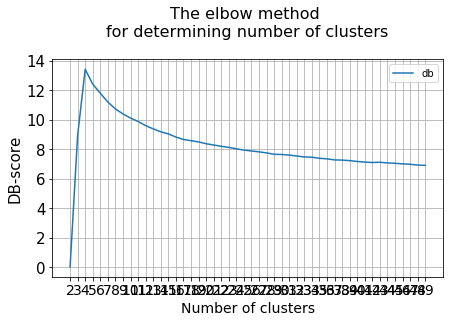

In [62]:
plt.figure(figsize=(7,4))
plt.title("The elbow method \nfor determining number of clusters\n",fontsize=16)
#plt.plot([i for i in range(2,12)],km_scores)
plt.plot([i for i in range(2,n_clusters)],db_score)
plt.legend(['db'])
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("DB-score",fontsize=15)
plt.xticks([i for i in range(2,n_clusters)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

## Hierachical Clustering

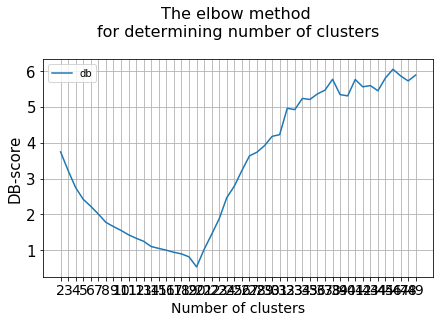

## Mean-shift Clustering

In [63]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# we will let the algorithm estimate the bandwith
ms_bandwidth = estimate_bandwidth(X1)
print('{:.5}'.format(ms_bandwith))
ms = MeanShift(bandwidth=ms_bandwidth, n_jobs=-1)
ms.fit(X1)

94.22


MeanShift(bandwidth=1.6181057145370323, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=-1, seeds=None)

In [64]:
cluster_centers = ms.cluster_centers_
len(cluster_centers) # number of clusters

2

## DBSCAN

Consider [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) because it is multithreaded.